In [2]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [19]:
url <- "https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/School%20Grades/school_grades_dataset.csv"
math = read_csv(url)
head(math)

math_split <- initial_split(math, prop = 0.75, strata = G3)
math_training <- training(math_split)
math_testing <- testing(math_split)

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


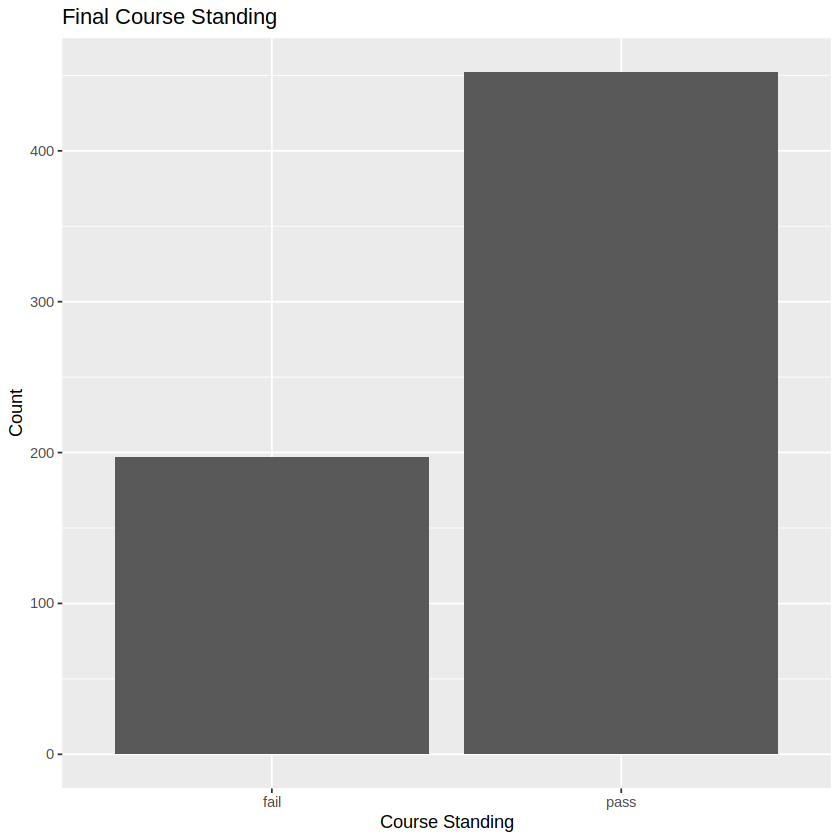

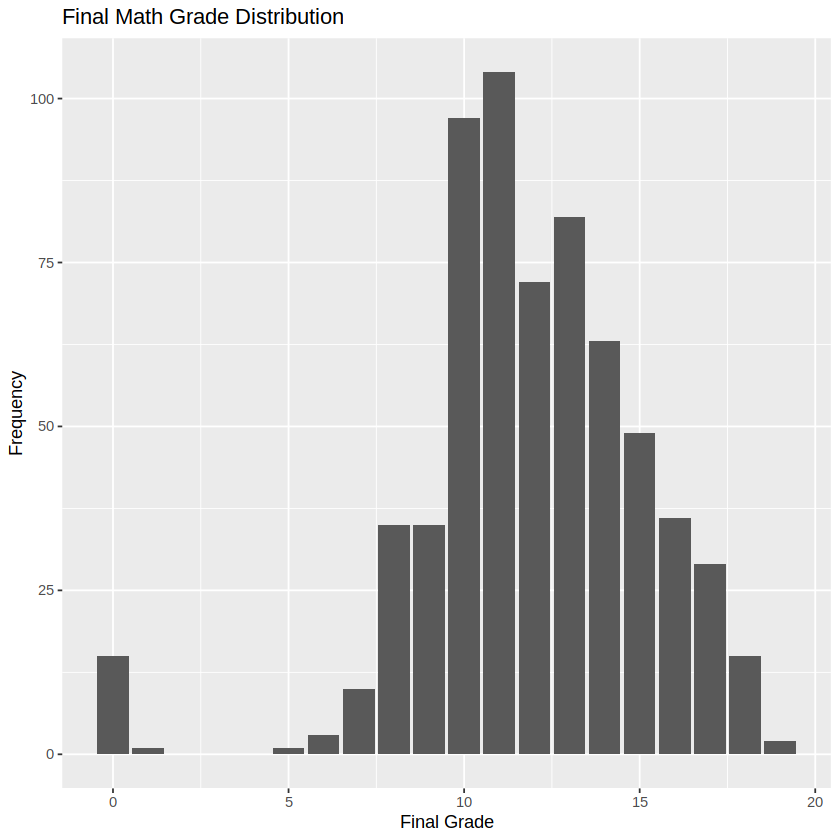

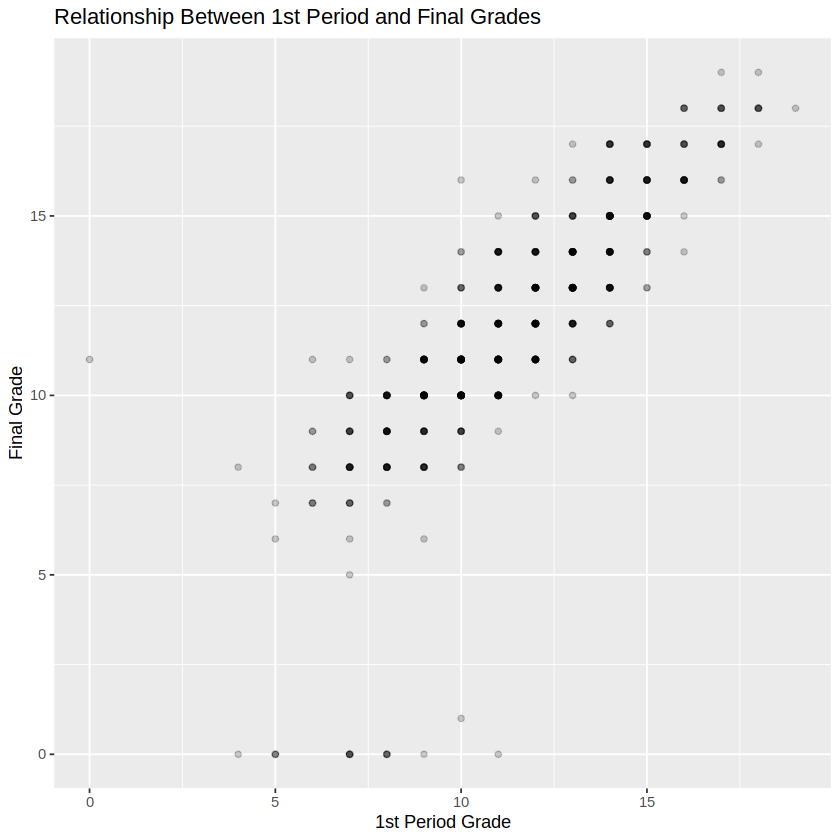

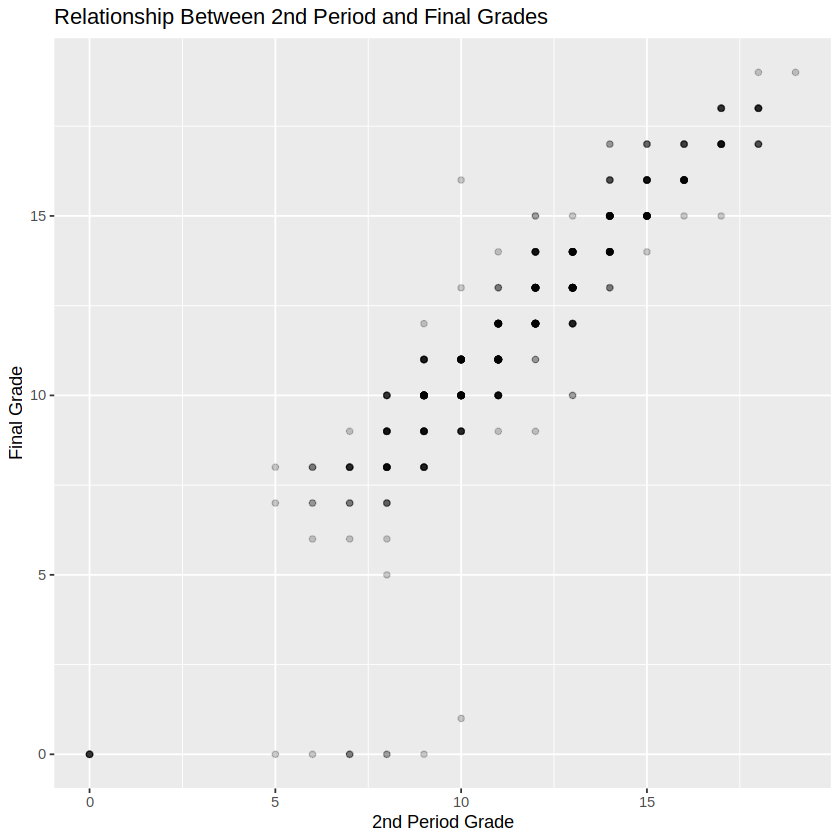

In [23]:
# Seeing proportions of each grade in a table

math <- math |> mutate(standing = ifelse(G3 > 10, "pass", "fail"))
pass_plot <- math |>
            ggplot(aes(x = standing)) +
            geom_bar() +
            labs(x = "Course Standing", y = "Count") +
            ggtitle("Final Course Standing")
pass_plot

grade_bar <- math |>
                        group_by(G3) |>
                        summarize(count = n())|>
                        ggplot(aes(x = G3, y = count)) +
                        geom_bar(stat = "identity") +
                        labs(x = "Final Grade", y = "Frequency") +
                        ggtitle("Final Math Grade Distribution")
grade_bar

G1_G3_scatterplot <- math |>
                    ggplot(aes(x = G1, y = G3)) +
                    geom_point(alpha = 0.2) +
                    labs(x = "1st Period Grade", y = "Final Grade") +
                    ggtitle("Relationship Between 1st Period and Final Grades")

G1_G3_scatterplot


G2_G3_scatterplot <- math |>
                    ggplot(aes(x = G2, y = G3)) +
                    geom_point(alpha = 0.2) +
                    labs(x = "2nd Period Grade", y = "Final Grade") +
                    ggtitle("Relationship Between 2nd Period and Final Grades")

G2_G3_scatterplot
